**Objective**:<br>
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Context**: <br>
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.
Data Description: 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

**Data Dictionary:**
- *RowNumber*: Row number.
- *CustomerId*: Unique identification key for different customers.
- *Surname*: Surname of the customer
- *Credit Score*: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- *Geography*: The country to which the customer belongs.
- *Gender*: The gender of the customer.
- *Age*: Age of the customer.
- *Tenure*: The period of time a customer has been associated with the bank.
- *Balance*: The account balance (the amount of money deposited in the bank account) of the customer.
- *NumOfProducts*: How many accounts, bank account affiliated products the person has.
- *HasCrCard*: Does the customer have a credit card through the bank?
- *IsActiveMember*: Subjective, but for the concept
- *EstimatedSalary*: Estimated salary of the customer.
- *Exited*: Did they leave the bank after all?


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

The points distribution for this case is as follows:

1. **Read the dataset**
2. **Drop the columns which are unique for all users like IDs** (5 points)


In [4]:
bData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')

In [6]:
bData.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
bData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
bData.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [9]:
bData.shape

(10000, 11)

In [10]:
bData.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
bData.duplicated().sum()

0

3. **Perform bivariate analysis and give your insights from the same** (5 points) 

In [12]:
bData.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Visualize Data

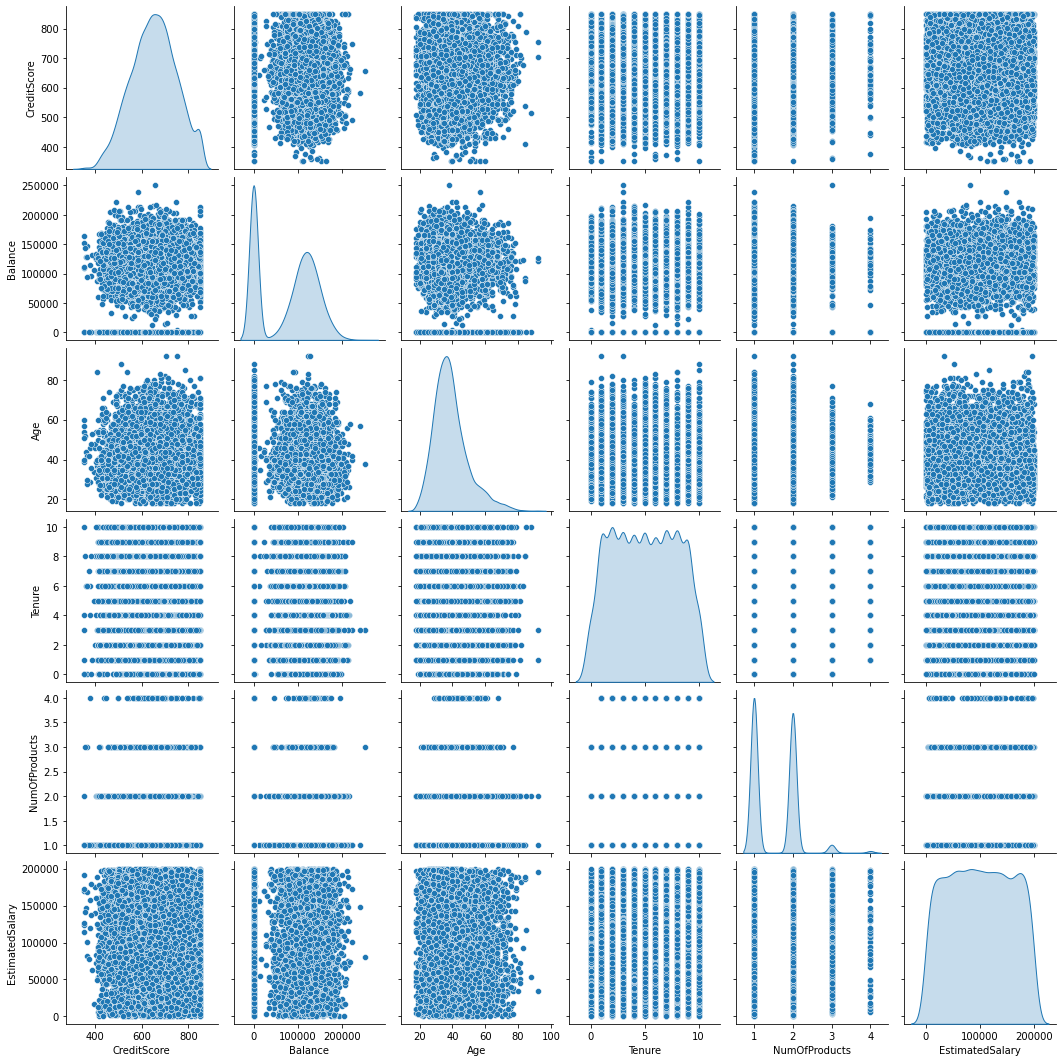

In [13]:
num_vars = ['CreditScore', 'Balance', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']
cat_vars = ['Geography', 'Gender',  'HasCrCard', 'IsActiveMember',  'Exited']

sns.pairplot(bData[num_vars], diag_kind='kde')

From the pairplot, there is no clear bivariate correlation between numerical variables. They all seem to be independent of each other. Below is a correlation plot to buttress this claim.

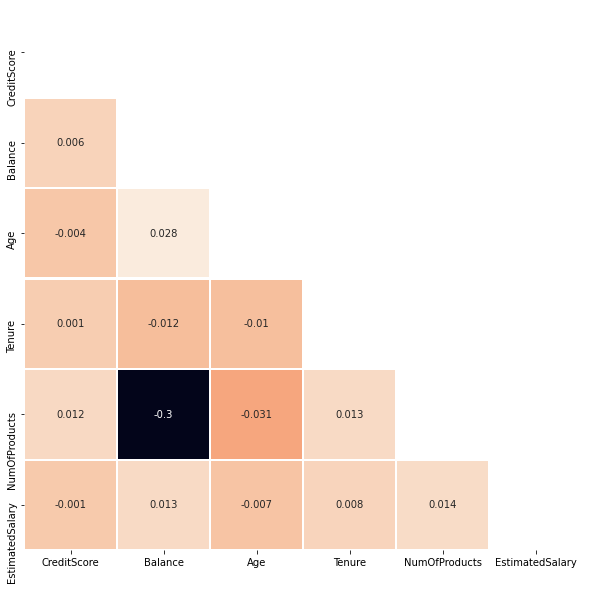

In [14]:
corr =bData[num_vars].corr().round(3)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize= (10,10))
sns.heatmap(corr, annot=True, cbar=False, mask=mask, fmt=".2",linewidths=1.5);

Below i check for outliers in my dataset mainlt focusing on numerical variables

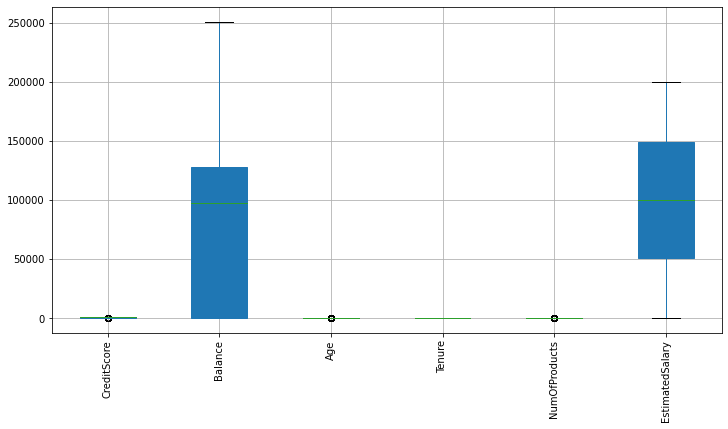

In [15]:
plt.figure(figsize=(12,6))
mplot = bData[num_vars].boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

There are no outliers observed in the dataset. Now i want to investigate how much the bank lost to those who churned. below is a visual representation of the loss

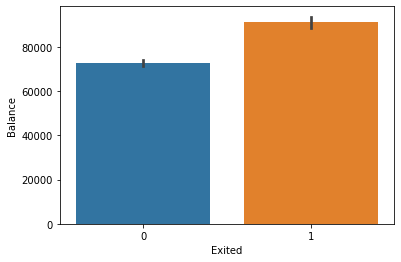

In [16]:
sns.barplot(x='Exited', y='Balance', data=bData);

The churn concern by the bank is undoubtedly justified by the Balance of those who have exited the bank as it is significantly higher than that of the retained clientelle

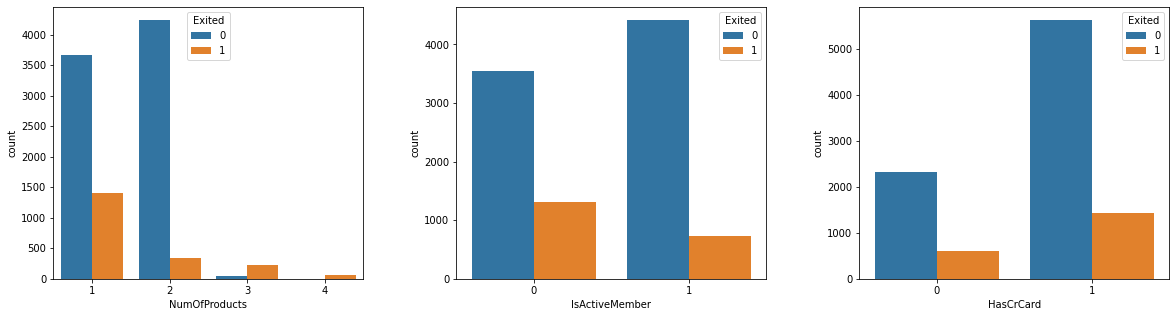

In [17]:
_, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x='NumOfProducts', hue='Exited', data=bData, ax= ax[0])
sns.countplot(x='IsActiveMember', hue='Exited', data=bData, ax= ax[1])
sns.countplot(x='HasCrCard', hue='Exited', data=bData, ax= ax[2]);

The graphs above show that there is higher churn rate for members who have credit cards, while inactive members are highly likely to churn than the active. Churn rate is also higher for clients with ony one product, though relative to the number of clients in each category (ie. number of products) it will seem that there is more churn for clients with at least 3 products with the bank

Exited        0     1
Geography            
France     0.84  0.16
Germany    0.68  0.32
Spain      0.83  0.17


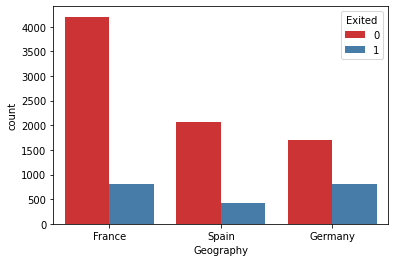

Exited     0     1
Gender            
Female  0.75  0.25
Male    0.84  0.16


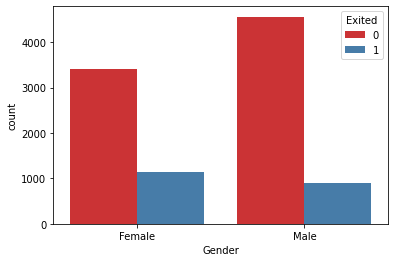

Exited             0     1
IsActiveMember            
0               0.73  0.27
1               0.86  0.14


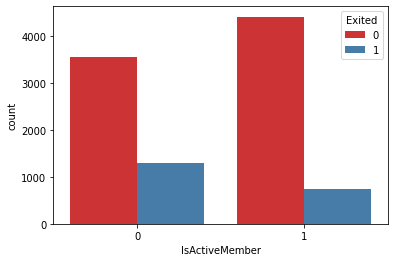

In [18]:
for i in ['Geography','Gender','IsActiveMember']:
    print(pd.crosstab(bData[i], bData['Exited'],normalize='index').round(2))
    sns.countplot(x=i,hue='Exited',data=bData,palette='Set1');
    plt.show()

In [19]:
Exited_0 = bData[bData['Exited']==0]
Exited_1 = bData[bData['Exited']==1]

Number of people with zero balance who churned are:    500
Number of people with zero balance as a percentage of those who churned:    24.55


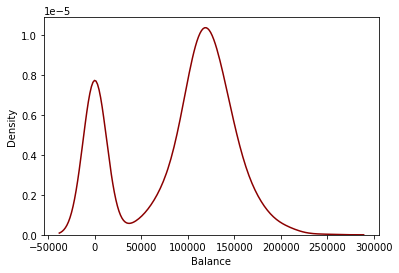

In [20]:
sns.kdeplot(Exited_1.Balance, label='Exited = 0', color='DarkRed')
zero_balance = Exited_1[Exited_1["Balance"]==0]["Balance"].count()
print("Number of people with zero balance who churned are:   ", zero_balance)
print("Number of people with zero balance as a percentage of those who churned:   ", round((zero_balance/Exited_1.shape[0])*100, 2))

From the analysis above, it has been established that only 25% of those that churned did not owe the bank (*Zero Balance*). That means the amount of loss incurred by the bank is incurred from 75% of those who churned.

**Below i investigate if Age contributes to churn**

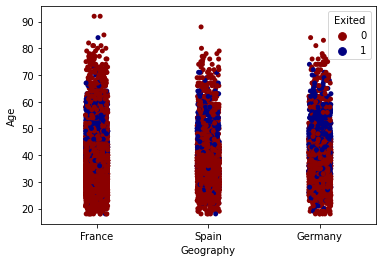

In [21]:
sns.stripplot(x = 'Geography', y= 'Age', hue = 'Exited', data= bData, palette= ['DarkRed','navy']);

In [22]:
Exited_1.Geography.value_counts()

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

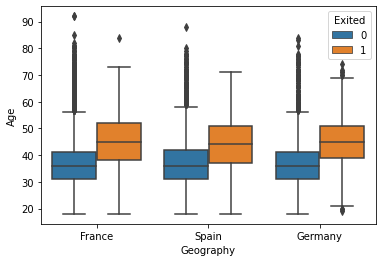

In [ ]:
sns.boxplot(x='Geography', y='Age', hue= 'Exited', data=bData);

The analysis above suggests that there Germany and France have the highest churn numbers. Also median age of churn is around 45 years across the countries

In [23]:
bData[cat_vars].iloc[:,2:].apply(pd.Series.value_counts)

,HasCrCard,IsActiveMember,Exited
0,2945,4849,7963
1,7055,5151,2037


In [24]:
bData_enc = pd.get_dummies(bData)
bData_enc = bData_enc.astype('float32') # to enable conversion into tensors.

In [25]:
bData.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [26]:
bData_enc.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,1.0,0.0,0.0,1.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,0.0,1.0,1.0,0.0


In [27]:
bData_enc.shape

(10000, 14)

In [28]:
bData_enc.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.0,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.78,1.53,0.71,0.52,100090.12,0.2,0.5,0.25,0.25,0.45,0.55
std,96.65,10.49,2.89,62398.95,0.58,0.46,0.50,57510.47,0.4,0.5,0.43,0.43,0.50,0.50
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0,0.0,0.00,0.00,0.00,0.00
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0,0.0,0.00,0.00,0.00,0.00
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.0,1.0,0.00,0.00,0.00,1.00
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0,1.0,1.00,0.00,1.00,1.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0,1.0,1.00,1.00,1.00,1.00


4. **Distinguish the feature and target set and divide the data set into training and test sets** (5 points)


In [29]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [30]:
y = bData_enc.loc[:,'Exited']
X = bData_enc.loc[:, bData_enc.columns != 'Exited']

In [31]:
X.shape, y.shape

((10000, 13), (10000,))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 13) (8000,)
(2000, 13) (2000,)


In [34]:
y_train.value_counts(normalize=True)

0.0    0.79675
1.0    0.20325
Name: Exited, dtype: float64

In [35]:
y_test.value_counts(normalize=True)

0.0    0.7945
1.0    0.2055
Name: Exited, dtype: float64

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

5. **Normalize the train and test data** (10points)


In [83]:
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

6. **Initialize & build the model. Identify the points of improvement and implement the same.** (20)


In [84]:
model = Sequential() #Initializing the model
model

***Add layers and Activations***

In [85]:
# Base Model
model.add(Dense(100, input_shape = (13,), activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [86]:
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_13 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 26        
Total params: 7,751
Trainable params: 7,751
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(X_train, y_train.values, batch_size = 1000, epochs = 10, verbose = 1,  )

Epoch 1/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6577 - accuracy: 0.6309
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5254 - accuracy: 0.7952
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4840 - accuracy: 0.7979
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.8000
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.8055
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4319 - accuracy: 0.8097
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4174 - accuracy: 0.8150
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4124 - accuracy: 0.8156
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4049 - accuracy: 0.8258
Epoch 10/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4019 - accuracy: 0.8295


In [89]:
results = model.evaluate(X_test, y_test.values, batch_size=200, verbose=0)

In [90]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.3944188058376312, 0.8314999938011169]


**Points of Improvement** <br>
Simplifying the network  by reducing the number of neurons and then add more hidden layers

In [91]:
classifier = Sequential() #Initializing the model
classifier.add(Dense(13, input_shape = (13,), activation = 'relu')) # number of neurons equated to number of features (inputs)
classifier.add(Dense(20, activation = 'relu'))
classifier.add(Dense(20, activation = 'relu'))
classifier.add(Dense(20, activation = 'relu'))
classifier.add(Dense(20, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

In [92]:
classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_16 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_18 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_19 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 21        
Total params: 1,743
Trainable params: 1,743
Non-trainable params: 0
____________________________________________________

In [93]:
classifier.fit(X_train, y_train.values, batch_size = 1000, 
               epochs = 10, verbose = 1, validation_split=0.2, 
               callbacks=EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1))

Epoch 1/10
7/7 [==============================] - 1s 35ms/step - loss: 0.7583 - accuracy: 0.2257 - val_loss: 0.6994 - val_accuracy: 0.4731
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.6887 - accuracy: 0.5922 - val_loss: 0.6518 - val_accuracy: 0.7875
Epoch 3/10
7/7 [==============================] - 0s 9ms/step - loss: 0.6403 - accuracy: 0.7916 - val_loss: 0.6022 - val_accuracy: 0.7894
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5852 - accuracy: 0.7995 - val_loss: 0.5538 - val_accuracy: 0.7894
Epoch 5/10
7/7 [==============================] - 0s 9ms/step - loss: 0.5363 - accuracy: 0.7983 - val_loss: 0.5238 - val_accuracy: 0.7894
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5079 - accuracy: 0.7974 - val_loss: 0.5187 - val_accuracy: 0.7894
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 0.5021 - accuracy: 0.7950 - val_loss: 0.5125 - val_accuracy: 0.7894
Epoch 8/10
7/7 [==============

In [94]:
results = classifier.evaluate(X_test, y_test.values, batch_size=200, verbose=0)

print(classifier.metrics_names)
print(results)

['loss', 'accuracy']
[0.47012922167778015, 0.7944999933242798]


This did not improve the model.
Add dropout with a theshold of 0.5 and an EarlyStop

In [95]:
model_adj = Sequential() #Initializing the model

In [96]:
model_adj.add(Dense(100, input_shape = (13,), activation = 'relu'))
model_adj.add(Dropout(0.5))
model_adj.add(Dense(50, activation = 'relu'))
model_adj.add(Dropout(0.5))
model_adj.add(Dense(25, activation = 'relu'))
model_adj.add(Dropout(0.5))
model_adj.add(Dense(1, activation = 'sigmoid'))

In [97]:
model_adj.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
model_adj.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               1400      
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 25)                1275      
_________________________________________________________________
dropout_9 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                

In [98]:
model_adj.fit(X_train, y_train.values, batch_size = 1000, 
               epochs = 10, verbose = 1, validation_split=0.2, 
               callbacks=EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1))

Epoch 1/10
7/7 [==============================] - 1s 40ms/step - loss: 0.8180 - accuracy: 0.3976 - val_loss: 0.6017 - val_accuracy: 0.7894
Epoch 2/10
7/7 [==============================] - 0s 14ms/step - loss: 0.6010 - accuracy: 0.7027 - val_loss: 0.5041 - val_accuracy: 0.7894
Epoch 3/10
7/7 [==============================] - 0s 13ms/step - loss: 0.5404 - accuracy: 0.7822 - val_loss: 0.4815 - val_accuracy: 0.7894
Epoch 4/10
7/7 [==============================] - 0s 13ms/step - loss: 0.5271 - accuracy: 0.7875 - val_loss: 0.4684 - val_accuracy: 0.7894
Epoch 5/10
7/7 [==============================] - 0s 13ms/step - loss: 0.4957 - accuracy: 0.7988 - val_loss: 0.4654 - val_accuracy: 0.7894
Epoch 6/10
7/7 [==============================] - 0s 13ms/step - loss: 0.4932 - accuracy: 0.7933 - val_loss: 0.4620 - val_accuracy: 0.7894
Epoch 7/10
7/7 [==============================] - 0s 14ms/step - loss: 0.4845 - accuracy: 0.7959 - val_loss: 0.4557 - val_accuracy: 0.7894
Epoch 8/10
7/7 [===========

In [99]:
results = model_adj.evaluate(X_test, y_test.values, batch_size=200, verbose=0)

print(model_adj.metrics_names)
print(results)

['loss', 'accuracy']
[0.4310018718242645, 0.7944999933242798]


Reduce the number of neurons again, with dropout and and earlystop

In [100]:
model3 = Sequential()

In [101]:
model3.add(Dense(72, input_shape = (13,), activation = 'relu'))
model3.add(Dropout(0.4))
model3.add(Dense(36, activation = 'relu'))
model3.add(Dropout(0.4))
model3.add(Dense(18, activation = 'relu'))
model3.add(Dropout(0.4))
model3.add(Dense(1, activation = 'sigmoid'))

In [102]:
model3.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 72)                1008      
_________________________________________________________________
dropout_10 (Dropout)         (None, 72)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 36)                2628      
_________________________________________________________________
dropout_11 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 18)                666       
_________________________________________________________________
dropout_12 (Dropout)         (None, 18)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                

In [103]:
model3.fit(X_train, y_train.values, batch_size = 1000, 
               epochs = 10, verbose = 1, validation_split=0.2, 
               callbacks=EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1))

Epoch 1/10
7/7 [==============================] - 1s 34ms/step - loss: 0.7737 - accuracy: 0.4441 - val_loss: 0.5636 - val_accuracy: 0.7887
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5897 - accuracy: 0.7432 - val_loss: 0.4997 - val_accuracy: 0.7894
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5420 - accuracy: 0.7892 - val_loss: 0.4776 - val_accuracy: 0.7894
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5153 - accuracy: 0.7914 - val_loss: 0.4674 - val_accuracy: 0.7894
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.4858 - accuracy: 0.8001 - val_loss: 0.4615 - val_accuracy: 0.7894
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.4775 - accuracy: 0.7935 - val_loss: 0.4561 - val_accuracy: 0.7894
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.4664 - accuracy: 0.8030 - val_loss: 0.4521 - val_accuracy: 0.7894
Epoch 8/10
7/7 [===========

In [104]:
results = model3.evaluate(X_test, y_test.values, batch_size=200, verbose=0)

print(model3.metrics_names)
print(results)

['loss', 'accuracy']
[0.42410731315612793, 0.7944999933242798]


## Hyper Parameter Tuning with Tuner

In [61]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 3.3MB/s 


In [105]:
from kerastuner.tuners import RandomSearch

In [107]:
def build_model(hp):
  model = Sequential()
  
  ## for loop for hidden layers
  for i in range(hp.Int('num_layers', 3, 20)):
    ## Add hidden layer and 
    ## finding units for each layer
    model.add(Dense(units=hp.Int('units' + str(i),
                                        min_value=20,
                                        max_value=100,
                                        step=1),
                           activation='relu'))
    model.add(Dropout(0.5))
    ## Add output layer
    model.add(Dense(1, activation='sigmoid'))
    ## Add optimizers and metrics
    model.compile(
      optimizer=tf.keras.optimizers.Adam(
          hp.Choice('learning_rate',
                    values=[1e-2, 1e-3, 1e-4])),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model
  
  
## Searching for the best model with good hyperparameter values
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='content',
    project_name='Cbank')
    
## summary of the search space like 
## which hyperparameter will optimize 
tuner.search_space_summary()

tuner.search(X_train, y_train.values,epochs=5,validation_data=(X_test, y_test.values))

Trial 5 Complete [00h 00m 25s]
val_accuracy: 0.7944999933242798

Best val_accuracy So Far: 0.7944999933242798
Total elapsed time: 00h 01m 44s
INFO:tensorflow:Oracle triggered exit


In [108]:
model4 = tuner.get_best_models(num_models=1)[0]
model4.fit(X_train, y_train.values, epochs=10, validation_data=(X_test, y_test.values))

Epoch 1/10
250/250 [==============================] - 4s 6ms/step - loss: 0.5237 - accuracy: 0.7994 - val_loss: 0.5087 - val_accuracy: 0.7945
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5279 - accuracy: 0.7946 - val_loss: 0.5082 - val_accuracy: 0.7945
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5195 - accuracy: 0.7977 - val_loss: 0.5087 - val_accuracy: 0.7945
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5189 - accuracy: 0.8006 - val_loss: 0.5084 - val_accuracy: 0.7945
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5197 - accuracy: 0.7929 - val_loss: 0.5081 - val_accuracy: 0.7945
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5185 - accuracy: 0.7966 - val_loss: 0.5081 - val_accuracy: 0.7945
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5097 - accuracy: 0.8014 - val_loss: 0.5084 - val_accuracy: 0.7945
Epoch 

In [76]:
results = model4.evaluate(X_test, y_test.values, batch_size=200, verbose=0)

print(model4.metrics_names)
print(results)

['loss', 'accuracy']
[0.4899410903453827, 0.7944999933242798]


**Final Model**

In [149]:
fin_model = Sequential()

fin_model.add(Dense(X.shape[1], input_shape = (13,), activation ='relu'))
fin_model.add(Dense(100, activation = 'relu'))
fin_model.add(Dense(50, activation = 'relu'))
fin_model.add(Dense(32, activation = 'relu'))
fin_model.add(Dense(1, activation = 'sigmoid'))

# Model compile
optimizer = optimizers.Adam(lr = 0.001)
fin_model.compile(optimizer = optimizer, loss ='binary_crossentropy',metrics=['accuracy'])

# training the new model
fin_model.fit(X_train, y_train.values,
           batch_size= 256, epochs = 10, 
           validation_split=0.2, 
           callbacks= [EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)],
           verbose = 1)

Epoch 1/10
25/25 [==============================] - 1s 10ms/step - loss: 0.5982 - accuracy: 0.7622 - val_loss: 0.5020 - val_accuracy: 0.7894
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4683 - accuracy: 0.8033 - val_loss: 0.4732 - val_accuracy: 0.7894
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4460 - accuracy: 0.8022 - val_loss: 0.4618 - val_accuracy: 0.7894
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4364 - accuracy: 0.7997 - val_loss: 0.4469 - val_accuracy: 0.7969
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4111 - accuracy: 0.8148 - val_loss: 0.4306 - val_accuracy: 0.8087
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4039 - accuracy: 0.8224 - val_loss: 0.4125 - val_accuracy: 0.8188
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3772 - accuracy: 0.8338 - val_loss: 0.3943 - val_accuracy: 0.8231
Epoch 8/10
25/25 [=

In [150]:
results = fin_model.evaluate(X_test, y_test.values, batch_size=200, verbose=0)

print(fin_model.metrics_names)
print(results)

['loss', 'accuracy']
[0.37259989976882935, 0.8479999899864197]


**Cross Validation to check model performance as we vary training data**

In [164]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
Z = X.values
Y = y.values
cvscores = []
for train, test in kfold.split(Z, y):
  model= Sequential()
  model.add(Dense(X.shape[1], input_shape = (13,), activation ='relu'))
  model.add(Dense(100, activation = 'relu'))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))
  # Model compile
  optimizer = optimizers.Adam(lr = 0.001)
  model.compile(optimizer = optimizer, loss ='binary_crossentropy',metrics=['accuracy'])

  model.fit(Z[train], Y[train], batch_size= 256, 
            epochs = 10, validation_split=0.2, verbose = 0, 
            callbacks= [EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)])
  # evaluate the model
  scores = model.evaluate(Z[test], Y[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 00009: early stopping
accuracy: 53.80%
Epoch 00005: early stopping
accuracy: 79.40%
Epoch 00009: early stopping
accuracy: 79.60%
Epoch 00006: early stopping
accuracy: 57.20%
Epoch 00010: early stopping
accuracy: 72.50%
Epoch 00005: early stopping
accuracy: 76.90%
Epoch 00007: early stopping
accuracy: 79.60%
Epoch 00007: early stopping
accuracy: 46.90%
Epoch 00004: early stopping
accuracy: 40.00%
Epoch 00006: early stopping
accuracy: 79.70%
66.56% (+/- 14.70%)


**Model Performance**
<br>


7. **Predict the results using 0.5 as a threshold** (10points)

In [152]:
pred = fin_model.predict(X_test, batch_size=200, verbose=0)
pred_y = np.where(pred>0.5,1,0)
pred_y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])


8. **Print the Accuracy score and confusion matrix** (5 points)


Accuracy :  0.848
Precision :  0.738
Recall :  0.404
F1-score:  0.522



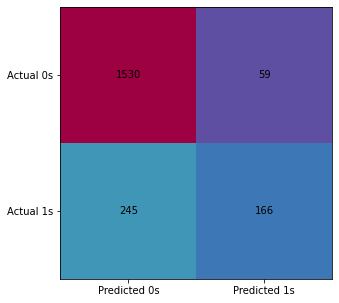

In [158]:
acc = round(results[1], 3)
pres = round(precision_score(y_test, pred_y), 3)
rec = round(recall_score(y_test, pred_y),3)
f1 = round(f1_score(y_test, pred_y),3)

print('')
print('Accuracy : ', acc)
print('Precision : ', pres)
print('Recall : ', rec)
print('F1-score: ' , f1)
print('')
cm = confusion_matrix(y_test.values, pred_y)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap='Spectral_r')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

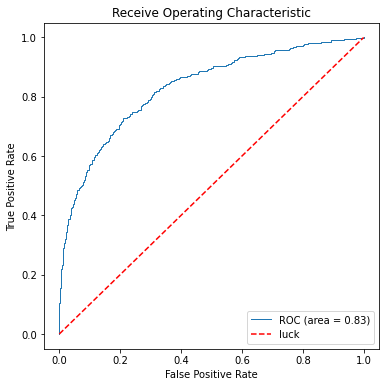

In [167]:
from sklearn.metrics import roc_curve, auc

y_predict_proba = fin_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr, lw=1, label='ROC (area = %.2f)' % (roc_auc))
ax.plot([0, 1], [0, 1], '--', color='red', label='luck')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receive Operating Characteristic')
ax.legend(loc='lower right')
plt.show()

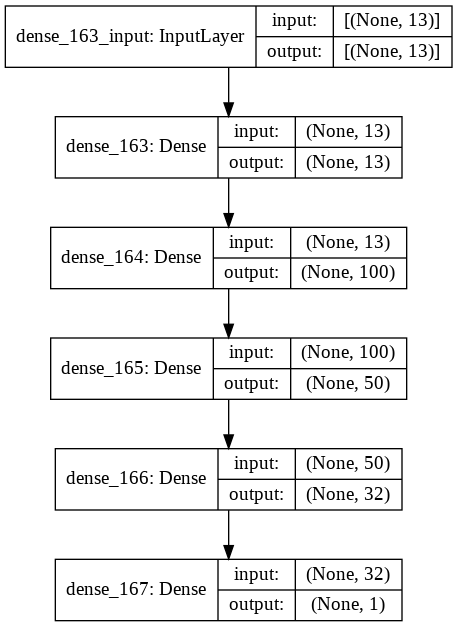

In [159]:
from keras.utils.vis_utils import plot_model

plot_model(fin_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Insights**<br>
From the model we get 1530 + 166 correct predictions, and consequently 245 + 59 incorrect predictions ( * thse results will change at each subsequent run of the model given the stochastic nature of hte model*)<br>
- It will seem that there is a high churn rate from members who are inactive (*27% exited*) than those who are active (*14% Exited*). it is in the best interest of the bank to investigate the reason for inactivity of clients inorder to make informed decision of how best to retain those customers <br>
- It will also seem like the higher the number of products one has with the bank, the higher the chances of churn. However even among those with only one product, the churn rate is relatively high. This may be pointing to a poor service delivery which management has to investigate and improve inorder to retain its clientelle<br>
- The study shows that the total balance of those that exited the bank exceeds in value that of the clientelle that remains. Ths could be that the bank is giving credit to clients with no capacity to payback hence there would be many defaulters which is also something management can look into inorder not to overburden the clientelle withs debts they can not manage and at the same time lose revenue because of defaulters<br>
-Overally we have developed a model that can tell with approximated 85% accuracy which customer is most likely to exit the bank given the features in this dataset. This information will help management drill down on customer with a high propensity to exit the bank and tailor make products and services that can help retain them